In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [434]:
df = pd.read_csv("Titanic.csv")
#link - https://www.kaggle.com/datasets/brendan45774/test-file

In [436]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [438]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


# Pandas

<Axes: ylabel='Frequency'>

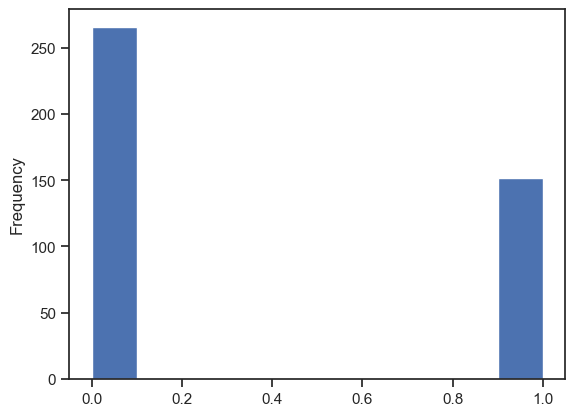

In [441]:
df["Survived"].plot(bins=10,kind="hist")

array([<Axes: title={'center': 'female'}, ylabel='Frequency'>,
       <Axes: title={'center': 'male'}, ylabel='Frequency'>], dtype=object)

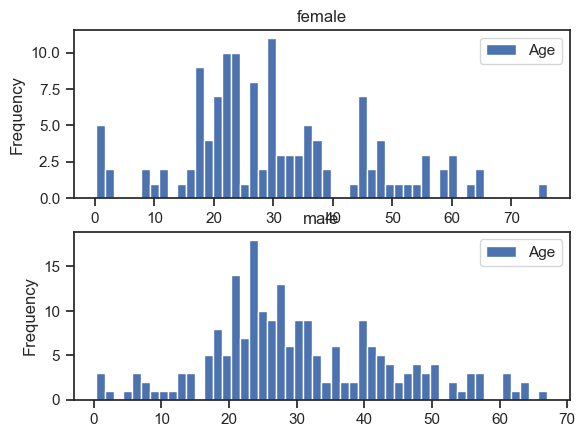

In [443]:
df.plot.hist(column="Age",by="Sex", bins=50)

# Broken Data


In [446]:
# I thought I am crazy...took me quite a while to realise that data was broken

array([<Axes: ylabel='0'>, <Axes: ylabel='1'>], dtype=object)

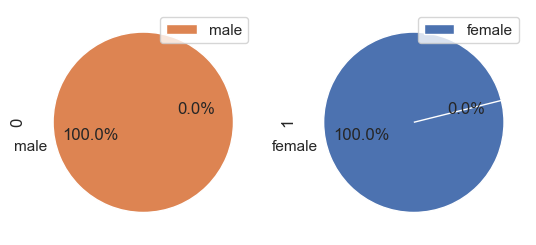

In [448]:
survival_counts = pd.crosstab(df['Sex'], df['Survived'])
survival_counts.plot.pie(subplots=True, autopct='%1.1f%%', startangle=14)

In [450]:
survival_counts.head()

Survived,0,1
Sex,,
female,0,152
male,266,0


In [452]:
female_survived_count = df[(df['Sex'] == 'female') & (df['Survived'] == 1)].shape[0]
female_total_count = df[df['Sex'] == 'female'].shape[0]

In [454]:
female_survived_count

152

In [456]:
female_total_count

152

# So here is another one

In [459]:
# Define age groups
def age_group(age):
    if age < 18:
        return 'Child'
    elif 18<age<35:
        return '18-35'
    elif 35<age<60:
        return '35-60'
    else:
        return '60+'

In [461]:
df["AgeGroup"]=df["Age"].apply(age_group)


In [463]:
age_counts = pd.crosstab(df['Sex'], df['AgeGroup'])
age_counts.head()

AgeGroup,18-35,35-60,60+,Child
Sex,,,,
female,59,34,42,17
male,109,57,76,24


<Axes: title={'center': 'Age Destribution'}, xlabel='Sex'>

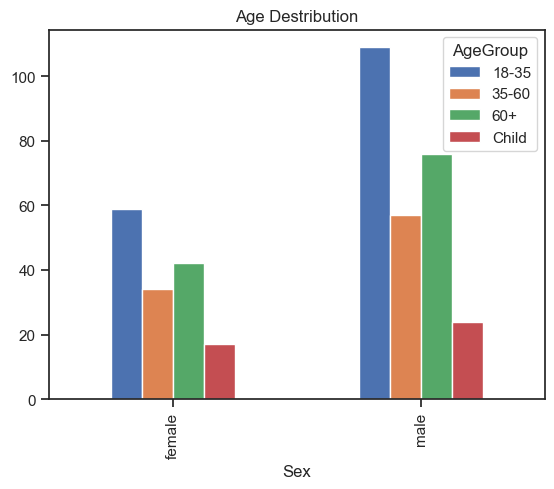

In [465]:
age_counts.plot(subplots=False, title="Age Destribution", layout=(2,2), table=False, kind="bar")

# Matplotlib

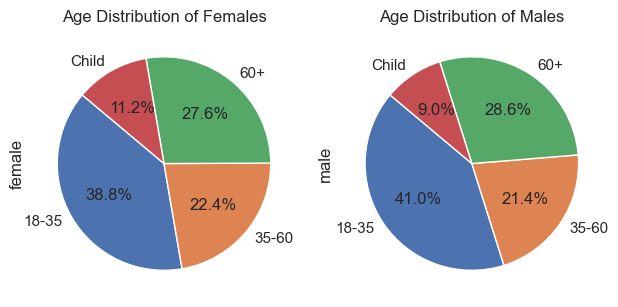

In [468]:
plt.subplot(1,2,1)
age_counts.loc['female'].plot.pie(autopct='%1.1f%%',startangle=140)
plt.title('Age Distribution of Females')

plt.subplot(1,2,2)
age_counts.loc['male'].plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Age Distribution of Males')

plt.tight_layout()
plt.show()

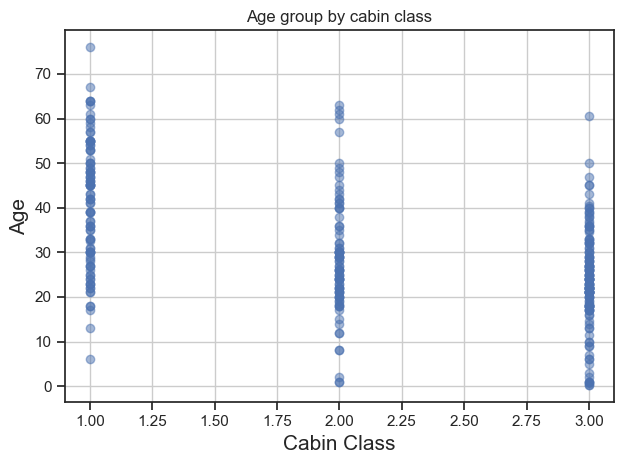

In [470]:
fig, ax = plt.subplots()
ax.scatter(df["Pclass"], df["Age"], alpha=0.5)

ax.set_xlabel("Cabin Class", fontsize=15)
ax.set_ylabel("Age", fontsize=15)
ax.set_title('Age group by cabin class')

ax.grid(True)
fig.tight_layout()

plt.show()

In [472]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,18-35
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,35-60
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,60+
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,18-35
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,18-35


Text(0, 0.5, 'Fare')

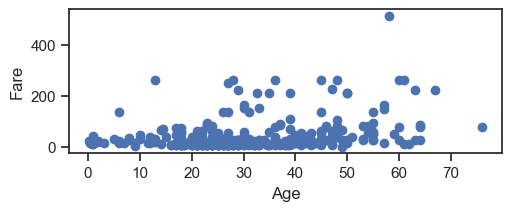

In [474]:
fig, ax = plt.subplots(figsize=(5, 2), layout='constrained')
ax.scatter(df['Age'],df['Fare'])
ax.set_xlabel('Age')
ax.set_ylabel('Fare')

In [476]:
grouped_df = df.groupby(['Pclass', 'AgeGroup']).size().reset_index(name='Count')
grouped_df = grouped_df.pivot(index='AgeGroup', columns='Pclass', values='Count')
grouped_df.head(10)

Pclass,1,2,3
AgeGroup,,,
18-35,29,52,87
35-60,53,18,20
60+,22,13,83
Child,3,10,28


<Axes: xlabel='AgeGroup'>

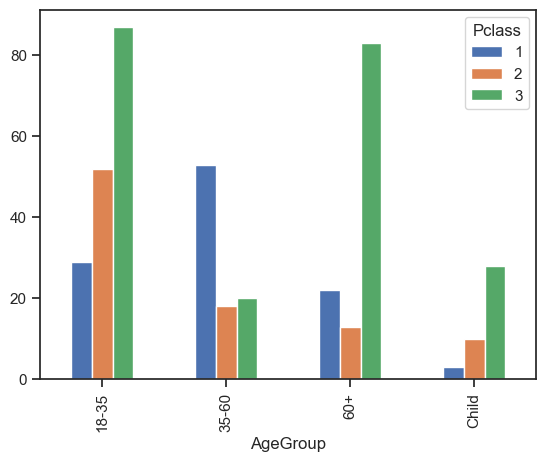

In [478]:
grouped_df.plot(kind="bar")

# Seaborn

In [481]:
import seaborn as sns

In [483]:
sns.set_theme(style="ticks")

In [487]:
age_counts.head()

AgeGroup,18-35,35-60,60+,Child
Sex,,,,
female,59,34,42,17
male,109,57,76,24


In [491]:
df["Total_People"] = len(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Total_People
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,18-35,418
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,35-60,418
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,60+,418
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,18-35,418
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,18-35,418


Text(0, 0.5, 'Count')

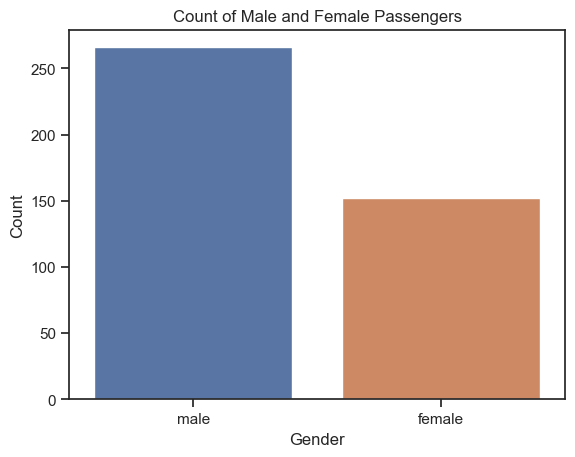

In [547]:
sns.countplot(x="Sex", data=df)
plt.title('Count of Male and Female Passengers')
plt.xlabel('Gender')
plt.ylabel('Count')

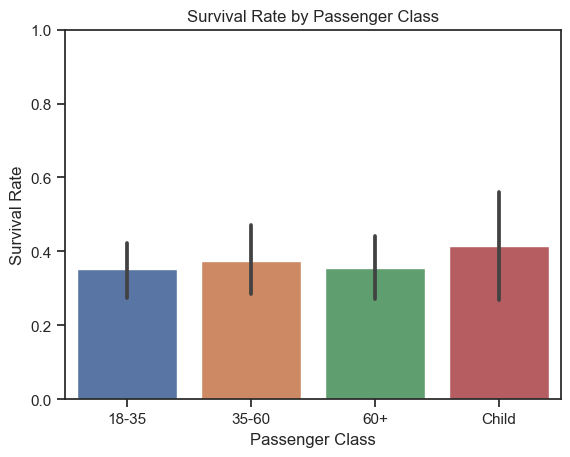

In [509]:
sns.barplot(x='AgeGroup', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


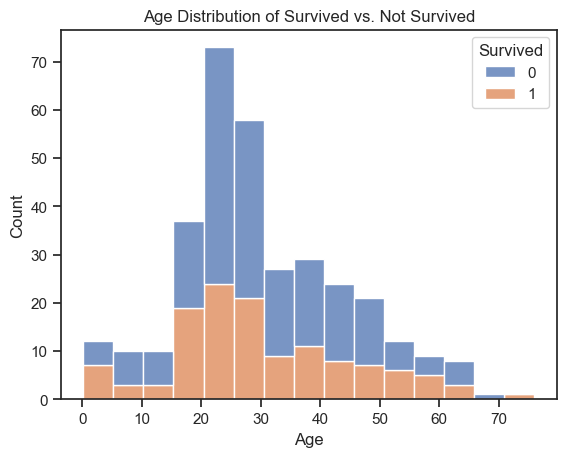

In [571]:
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack')
plt.title('Age Distribution of Survived vs. Not Survived')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

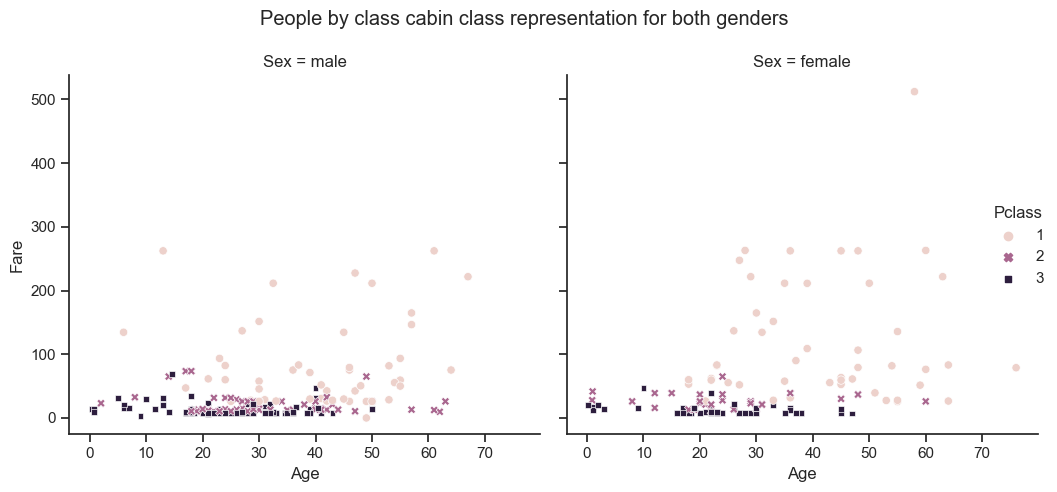

In [585]:
rel = sns.relplot(data=df, x='Age',y='Fare', col='Sex',hue="Pclass", style="Pclass")
rel.fig.suptitle('People by class cabin class representation for both genders')

plt.tight_layout()
plt.show()

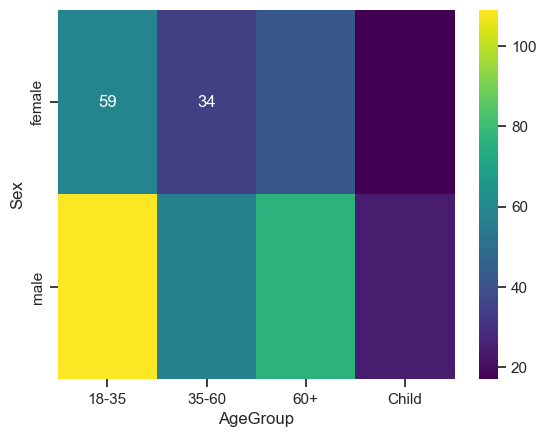

In [549]:
sns.heatmap(age_counts, annot=True, cmap='viridis')
plt.show()